In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# Load data
df = pd.read_csv('/wdata/clouds_from_weizmann/BOMEX_512X512X170_500CCN_20m/cropped/BOMEX_21720_30x36x18_o2.txt', 
            names=['x', 'y', 'z', 'lwc', 'reff', 'veff'],
            usecols=['z', 'reff'],
            sep=' ',
            skiprows=3)
df

,z,reff
0,2,4.252
1,7,6.582
2,6,5.726
3,2,4.456
4,7,6.523
...,...,...
2757,11,7.064
2758,10,6.938
2759,11,6.372
2760,2,5.044


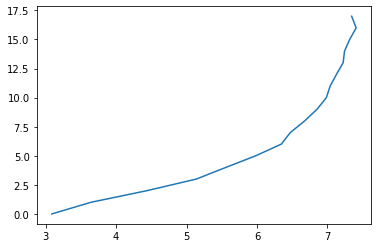

In [40]:
means = df.groupby('z').mean()
plt.plot(means['reff'], means.index)


In [43]:
means

,reff
z,
0,3.088125
1,3.644949
2,4.438172
3,5.140902
4,5.558380
5,5.982192
6,6.344390
7,6.473562
8,6.676464


In [41]:
df['reff'] = df.groupby('z').transform('mean')
df

,z,reff
0,2,4.438172
1,7,6.473562
2,6,6.344390
3,2,4.438172
4,7,6.473562
...,...,...
2757,11,7.038520
2758,10,6.984242
2759,11,7.038520
2760,2,4.438172


In [63]:
# Load data

df = pd.read_csv('/wdata/clouds_from_weizmann/BOMEX_512X512X170_500CCN_20m/cropped/BOMEX_21720_30x36x18_o2.txt', 
            names=['x', 'y', 'z', 'lwc', 'reff', 'veff'],
            sep=' ',
            skiprows=3)
df_z_reff = df.copy()[['z','reff']]


In [64]:
df_z_reff

,z,reff
0,2,4.252
1,7,6.582
2,6,5.726
3,2,4.456
4,7,6.523
...,...,...
2757,11,7.064
2758,10,6.938
2759,11,6.372
2760,2,5.044


In [65]:
df['reff'] = df_z_reff.groupby('z').transform('mean')
df = df.round(5)
df['reff'] = df['reff'].round(3)
df

,x,y,z,lwc,reff,veff
0,7,20,2,0.01170,4.438,0.15765
1,7,20,7,0.01651,6.474,0.10479
2,7,21,6,0.03769,6.344,0.12808
3,8,20,2,0.03399,4.438,0.13771
4,8,20,7,0.10160,6.474,0.11181
...,...,...,...,...,...,...
2757,25,24,11,0.04331,7.039,0.10488
2758,25,25,10,0.02822,6.984,0.08496
2759,25,25,11,0.04341,7.039,0.13245
2760,25,26,2,0.04017,4.438,0.11796


In [61]:
f = "/wdata/clouds_from_weizmann/BOMEX_512X512X170_500CCN_20m/cropped/BOMEX_21720_30x36x18_o2_mean_reff_per_z.txt"
np.savetxt(f, X=df.to_numpy(), fmt='%d %d %d %.5f %.3f %.5f')